# DS-SF-23 | Codealong 08 | Introduction to Classification

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import neighbors, metrics, grid_search, cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## Review and Activity | Customer Retention Rates

In [2]:
# TODO

train_df = pd.DataFrame({'t': range(8), 'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]})

In [3]:
train_df

survival_rate  t
0          1.000  0
1          0.869  1
2          0.743  2
3          0.653  3
4          0.593  4
5          0.551  5
6          0.517  6
7          0.491  7

In [4]:
# TODO

train_df['y']=train_df.survival_rate
train_df['x']=train_df.t

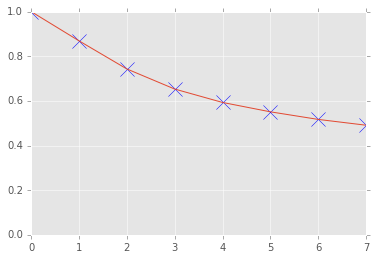

In [5]:
plt.figure()
plt.xlim((0, 7))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(train_df.x, train_df.y)

In [6]:
linear_model = smf.ols(formula = 'y ~ x', data = train_df).fit()

In [7]:
linear_model.summary()

/Users/VanessaG/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.91
Date:                Tue, 31 May 2016   Prob (F-statistic):           0.000153
Time:                        20:17:02   Log-Likelihood:                 13.061
No. Observations:                   8   AIC:                            -22.12
Df Residuals:                       6   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9254      0.035     26.258      0.000         0.839     1.012
x             -0.0709      0.008     -8.421      0.000        -0.092    -0.050
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.711
Skew:                           0.310   Prob(JB):                        0.701
Kurtosis:                       1.678   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
linear_model.params

Intercept    0.925417
x           -0.070940
dtype: float64

In [11]:
def linear_y_hat(x):
    # TODO
    return linear_model.params.Intercept + x * linear_model.params.x

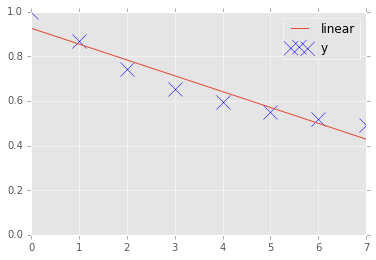

In [12]:
xs = pd.Series(np.linspace(0, 7, 700))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.legend()

In [13]:
quadratic_model = smf.ols(formula = 'y~x + x^2', data = train_df).fit()

In [14]:
quadratic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     30.03
Date:                Tue, 31 May 2016   Prob (F-statistic):            0.00164
Time:                        20:21:50   Log-Likelihood:                 13.121
No. Observations:                   8   AIC:                            -20.24
Df Residuals:                       5   BIC:                            -20.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9211      0.041     22.274      0.000         0.815     1.027
x             -0.0729      0.012     -6.252      0.002        -0.103    -0.043
x ^ 2          0.0032      0.012      0.275      0.795        -0.027     0.033
==============================================================================
Omnibus:                        1.491   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                0.769
Skew:                           0.342   Prob(JB):                        0.681
Kurtosis:                       1.644   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
def quadratic_y_hat(t):
    return quadratic_model.params[0] \
           + quadratic_model.params[1] * t \
           + quadratic_model.params[2] * (t ** 2)

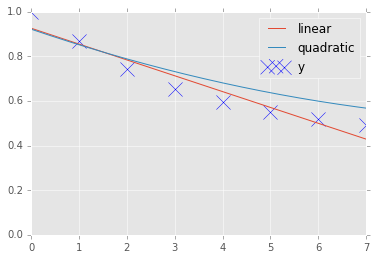

In [16]:
xs = pd.Series(np.linspace(0, 7, 700))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.legend()

In [17]:
def polynomial_y_hat(t):
    return 1.\
           - .100597619 * t \
           - .0596777778 * (t ** 2) \
           + .0380569444 * (t ** 3) \
           - .0101944444 * (t ** 4) \
           + .00153611111 * (t ** 5) \
           - .000127777778 * (t ** 6) \
           + .00000456349206 * (t ** 7)

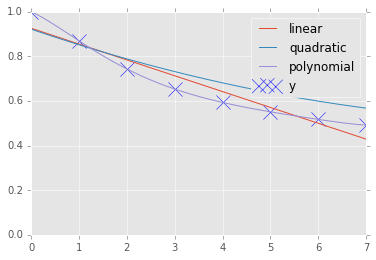

In [18]:
xs = pd.Series(np.linspace(0, 7, 700))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 1))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.plot(xs, xs.apply(polynomial_y_hat), label = 'polynomial')
plt.legend()

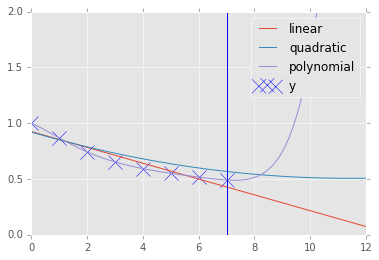

In [19]:
xs = pd.Series(np.linspace(0, 12, 1200))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 2))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.plot(xs, xs.apply(polynomial_y_hat), label = 'polynomial')
plt.axvline(x = 7)
plt.legend()

In [20]:
# TODO
test_df = pd.DataFrame({'t': range(8,13), 'survival_rate': [.468, .445, .427, .409, .394]})

In [21]:
test_df

survival_rate   t
0          0.468   8
1          0.445   9
2          0.427  10
3          0.409  11
4          0.394  12

In [22]:
test_df['y'] = test_df.survival_rate
test_df['x'] = test_df.t

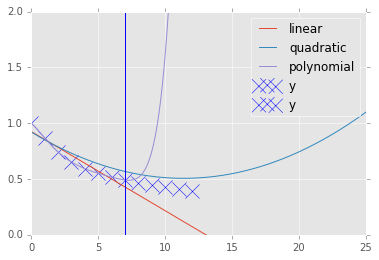

In [33]:
xs = pd.Series(np.linspace(0, 25, 1200))

plt.figure()
plt.xlim((xs.min(), xs.max()))
plt.ylim((0, 2))
plt.scatter(train_df.x, train_df.y, marker = 'x', s = 200)
plt.plot(xs, xs.apply(linear_y_hat), label = 'linear')
plt.plot(xs, xs.apply(quadratic_y_hat), label = 'quadratic')
plt.plot(xs, xs.apply(polynomial_y_hat), label = 'polynomial')
plt.axvline(x = 7)
plt.scatter(test_df.x, test_df.y, marker = 'x', s = 200)
plt.legend()

In [24]:
# TODO
test_df['linear_y_hat'] = test_df.x.apply(linear_y_hat)
test_df['quadratic_y_hat'] = test_df.x.apply(quadratic_y_hat)
test_df['polynomial_y_hat'] = test_df.x.apply(polynomial_y_hat)


In [27]:
# TODO
test_df.x.corr(test_df['linear_y_hat'])**2

1.0000000000000004

In [28]:
test_df.x.corr(test_df['quadratic_y_hat'])**2

0.8459460787618871

In [29]:
test_df.x.corr(test_df['polynomial_y_hat'])**2

0.79740040125972134

In [34]:
test_df.columns

Index([u'survival_rate', u't', u'y', u'x', u'linear_y_hat', u'quadratic_y_hat',
       u'polynomial_y_hat'],
      dtype='object')

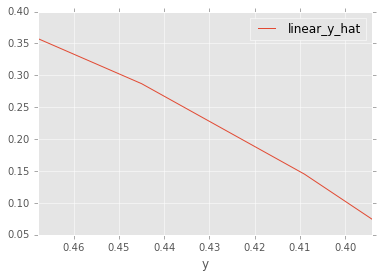

In [35]:
test_df.plot(x='y', y = 'linear_y_hat')

In [ ]:
# TODO

In [ ]:
plt.figure()
plt.xlim((test_df.y.min(), test_df.y.max()))
plt.ylim((0, 2))
plt.plot(test_df.y, test_df.y, label = 'y')
plt.plot(test_df.y, test_df.linear_y_hat, label = 'linear_y_hat')
plt.plot(test_df.y, test_df.quadratic_y_hat, label = 'quadratic_y_hat')
plt.plot(test_df.y, test_df.polynomial_y_hat, label = 'polynomial_y_hat')
plt.legend()

## `Iris` dataset

In [36]:
df = pd.read_csv(os.path.join('..', 'datasets', 'iris.csv'))

In [37]:
df

SepalLength  SepalWidth  PetalLength  PetalWidth    Species
0            5.1         3.5          1.4         0.2     Setosa
1            4.9         3.0          1.4         0.2     Setosa
2            4.7         3.2          1.3         0.2     Setosa
3            4.6         3.1          1.5         0.2     Setosa
4            5.0         3.6          1.4         0.2     Setosa
..           ...         ...          ...         ...        ...
145          6.7         3.0          5.2         2.3  Virginica
146          6.3         2.5          5.0         1.9  Virginica
147          6.5         3.0          5.2         2.0  Virginica
148          6.2         3.4          5.4         2.3  Virginica
149          5.9         3.0          5.1         1.8  Virginica

[150 rows x 5 columns]

## Part A - Activity | Iris Dataset | Exploratory Data Analysis

In [39]:
color = df.Species.map(pd.Series({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}))

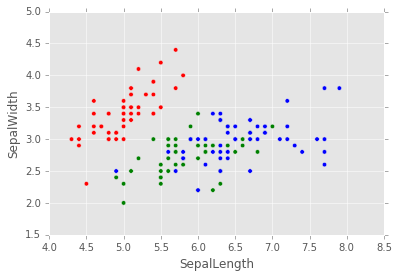

In [47]:
# TODO
df.plot('SepalLength', 'SepalWidth', kind = 'scatter', c=color )

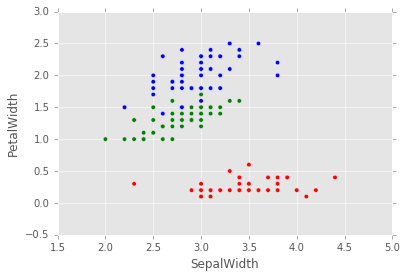

In [50]:
df.plot('SepalWidth', 'PetalWidth', kind = 'scatter', c=color )

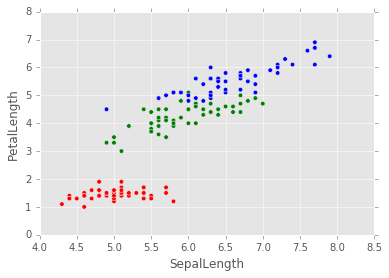

In [51]:
df.plot('SepalLength', 'PetalLength', kind = 'scatter', c=color )

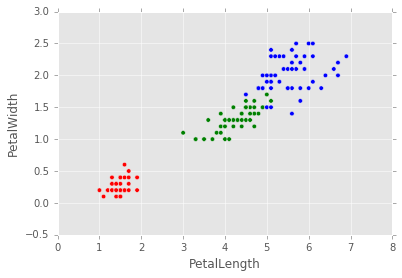

In [48]:
# TODO
df.plot('PetalLength', 'PetalWidth', kind = 'scatter', c=color )

In [ ]:
# TODO

In [ ]:
# TODO

## Part B - First hand-coded classifier

In [53]:
def my_first_classifier(row):
    # TODO
    if row.PetalLength < 2:
        return 'Setosa'
    else:
        return 'Versicolor'

In [54]:
y_hat = df.apply(my_first_classifier, axis = 1)

y_hat

0          Setosa
1          Setosa
2          Setosa
3          Setosa
4          Setosa
          ...    
145    Versicolor
146    Versicolor
147    Versicolor
148    Versicolor
149    Versicolor
dtype: object

In [55]:
species_df = pd.DataFrame({'Observed': df.Species, 'Predicted': y_hat})

species_df

Observed   Predicted
0       Setosa      Setosa
1       Setosa      Setosa
2       Setosa      Setosa
3       Setosa      Setosa
4       Setosa      Setosa
..         ...         ...
145  Virginica  Versicolor
146  Virginica  Versicolor
147  Virginica  Versicolor
148  Virginica  Versicolor
149  Virginica  Versicolor

[150 rows x 2 columns]

## Part C - Classification metrics

### Accuracy

In [58]:
# TODO
(species_df.Observed == species_df.Predicted).mean()

0.66666666666666663

### Misclassification rate

In [59]:
# TODO
(species_df.Observed != species_df.Predicted).mean()

0.33333333333333331

## Part D - Activity | Second hand-coded classifier

In [62]:
def my_second_classifier(row):
    # TODO
    if row.PetalLength < 2:
        return 'Setosa'
    elif row.PetalLength < 5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [63]:
y_hat = df.apply(my_second_classifier, axis = 1)

In [64]:
sum(y_hat != df.Species)

8

In [65]:
1. * sum(y_hat == df.Species) / len(df)

0.9466666666666667

## Part E

### Feature matrix and label vector

In [66]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
y = df.Species

In [67]:
X

SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]

In [68]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

### K-Nearest Neighbors (KNN)

In [69]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
y_hat = model.predict(X)

In [71]:
species_df = pd.DataFrame({'Observed': y, 'Predicted': y_hat})

species_df

Observed  Predicted
0       Setosa     Setosa
1       Setosa     Setosa
2       Setosa     Setosa
3       Setosa     Setosa
4       Setosa     Setosa
..         ...        ...
145  Virginica  Virginica
146  Virginica  Virginica
147  Virginica  Virginica
148  Virginica  Virginica
149  Virginica  Virginica

[150 rows x 2 columns]

In [72]:
species_df[species_df.Predicted != species_df.Observed]

Observed   Predicted
70   Versicolor   Virginica
72   Versicolor   Virginica
83   Versicolor   Virginica
106   Virginica  Versicolor
119   Virginica  Versicolor

In [73]:
sum(species_df.Predicted != species_df.Observed)

5

You can measure the precision of your prediction either manually or with `.score()`

In [74]:
1. * sum(species_df.Predicted == species_df.Observed) / len(df)

0.9666666666666667

In [75]:
model.score(X, y)

0.96666666666666667

# weights = 'uniform'

In [76]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X, y).score(X, y)

0.96666666666666667

# weights = 'distance'

In [77]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(X, y).score(X, y)

1.0

## Part F - What is the best value for `k`?

In [78]:
k = range(1, len(df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, y), axis = 1)

models

score_df['Score'] = models.map(lambda model: model.score(X, y))

In [79]:
score_df

k     Score
0      1  1.000000
1      2  0.980000
2      3  0.960000
3      4  0.960000
4      5  0.966667
..   ...       ...
144  145  0.600000
145  146  0.580000
146  147  0.580000
147  148  0.560000
148  149  0.546667

[149 rows x 2 columns]

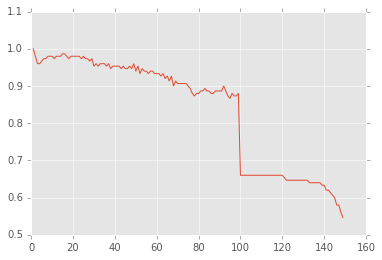

In [80]:
plt.plot(score_df.k, score_df.Score)

## Part G - Validation

60% of the dataset to train the model; the rest to test the model

In [ ]:
train_df = df.sample(frac = .6, random_state = 0).sort()

In [ ]:
train_df

In [ ]:
test_df = df.drop(train_df.index)

In [ ]:
test_df

The error in the training set is less than the error is the test set

In [ ]:
train_X = train_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
train_y = train_df.Species

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(train_X, train_y)
print 'train = ', model.score(train_X, train_y)

test_X = test_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
test_y = test_df.Species

print 'test  = ', model.score(test_X, test_y)

In [ ]:
k = range(1, len(train_df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_y), axis = 1)

score_df['TrainScore'] = models.apply(lambda model: model.score(train_X, train_y))
score_df['TestScore'] = models.apply(lambda model: model.score(test_X, test_y))

In [ ]:
score_df

In [ ]:
score_df.set_index('k').plot()

## Part H - Cross-Validation

In [ ]:
len(train_df)

In [ ]:
k_cv = 5 # 5-fold CV
k_nn = range(1, len(train_df) * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn},
    cv = cross_validation.KFold(len(train_df), n_folds = k_cv)
)

gs.fit(train_X, train_y)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'Score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

In [ ]:
plt.plot(score_df.k, score_df.Score)

In [ ]:
score_df[score_df.Score == score_df.Score.max()]

In [ ]:
score_df[score_df.Score == score_df.Score.min()]

In [ ]:
gs.score(test_X, test_y)